# Regressão Linear

Preços de casas.

Treino, Validação e Teste.

In [3]:
#@title Importar módulos
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [4]:
#@title Carregue os conjuntos de dados da Internet
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [5]:
#@title Dimensione os valores do rótulo
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

In [6]:
#@title Definir as funções que constroem e treinam um modelo
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, df, feature, label, my_epochs,
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the
  # rest of history.
  epochs = history.epoch

  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [7]:
#@title Defina a função de plotagem

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()

  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)

  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Epoch 1/30
136/136 [==============================] - 1s 2ms/step - loss: 37354.8828 - root_mean_squared_error: 193.2741 - val_loss: 45231.4648 - val_root_mean_squared_error: 212.6769
Epoch 2/30
136/136 [==============================] - 0s 1ms/step - loss: 21212.6074 - root_mean_squared_error: 145.6455 - val_loss: 26053.8242 - val_root_mean_squared_error: 161.4120
Epoch 3/30
136/136 [==============================] - 0s 1ms/step - loss: 11176.0098 - root_mean_squared_error: 105.7167 - val_loss: 14098.9150 - val_root_mean_squared_error: 118.7389
Epoch 4/30
136/136 [==============================] - 0s 1ms/step - loss: 6997.2705 - root_mean_squared_error: 83.6497 - val_loss: 9539.1172 - val_root_mean_squared_error: 97.6684
Epoch 5/30
136/136 [==============================] - 0s 1ms/step - loss: 6514.4580 - root_mean_squared_error: 80.7122 - val_loss: 9129.9854 - val_root_mean_squared_error: 95.5510
Epoch 6/30
136/136 [==============================] - 0s 1ms/step - loss: 6513.8828 - ro

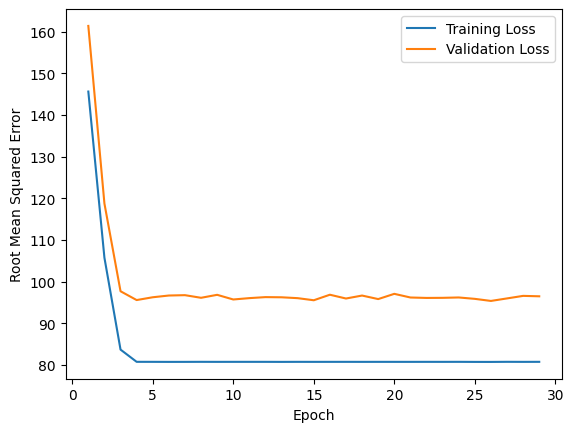

In [8]:
#@title Experimente a divisão de validação

# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set.
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based
# solely on the neighborhood's median income.

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature,
                                    my_label, epochs, batch_size,
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"],
                    history["val_root_mean_squared_error"])

In [10]:
train_df.head(n=1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.1,32.5,8.0,6533.0,1217.0,4797.0,1177.0,4.0,144.4
996,-117.1,34.6,6.0,5110.0,1044.0,1938.0,724.0,3.2,112.8
997,-117.1,34.2,22.0,4397.0,931.0,1145.0,445.0,4.5,108.4
998,-117.1,34.0,24.0,4144.0,826.0,2127.0,772.0,2.5,96.0


Epoch 1/70
136/136 [==============================] - 0s 2ms/step - loss: 43545.6289 - root_mean_squared_error: 208.6759 - val_loss: 33774.8633 - val_root_mean_squared_error: 183.7794
Epoch 2/70
136/136 [==============================] - 0s 1ms/step - loss: 25461.2344 - root_mean_squared_error: 159.5658 - val_loss: 18957.1914 - val_root_mean_squared_error: 137.6851
Epoch 3/70
136/136 [==============================] - 0s 1ms/step - loss: 13630.1592 - root_mean_squared_error: 116.7483 - val_loss: 10192.7988 - val_root_mean_squared_error: 100.9594
Epoch 4/70
136/136 [==============================] - 0s 1ms/step - loss: 7976.0078 - root_mean_squared_error: 89.3085 - val_loss: 7257.1416 - val_root_mean_squared_error: 85.1889
Epoch 5/70
136/136 [==============================] - 0s 1ms/step - loss: 6975.0698 - root_mean_squared_error: 83.5169 - val_loss: 7196.5757 - val_root_mean_squared_error: 84.8326
Epoch 6/70
136/136 [==============================] - 0s 1ms/step - loss: 6970.0254 - ro

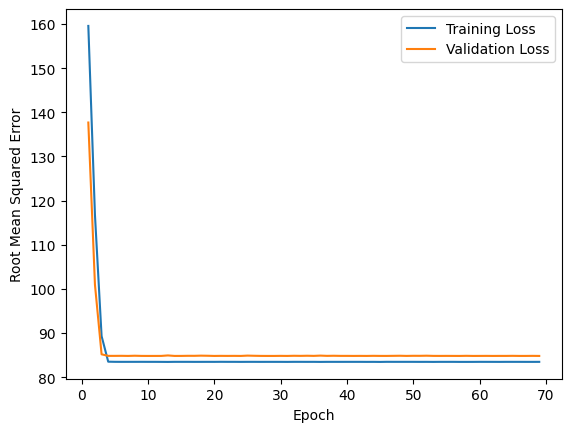

In [11]:
#@title Double-click to view the complete implementation.

# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 70
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set.
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based
# solely on the neighborhood's median income.

# Shuffle the examples.
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

# Invoke the functions to build and train the model. Train on the shuffled
# training set.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature,
                                    my_label, epochs, batch_size,
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"],
                    history["val_root_mean_squared_error"])

In [19]:
#@title Teste o conjunto de dados para avaliar o desempenho do seu modelo
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 828us/step - loss: 7009.0825 - root_mean_squared_error: 83.7203
